In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
x_train = np.loadtxt('/content/drive/MyDrive/cnn/input.csv',delimiter=",")
y_train = np.loadtxt('/content/drive/MyDrive/cnn/labels.csv',delimiter = ',')
x_test = np.loadtxt('/content/drive/MyDrive/cnn/input_test.csv',delimiter=',')
y_test = np.loadtxt('/content/drive/MyDrive/cnn/labels_test.csv',delimiter=',')

In [67]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)
x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

In [11]:
print('shape of x_train..',x_train.shape)
print('shape of y_train..',y_train.shape)
print('shape of x_test..',x_test.shape)
print('shape of y_test..',y_test.shape)


shape of x_train.. (2000, 100, 100, 3)
shape of y_train.. (2000, 1)
shape of x_test.. (400, 100, 100, 3)
shape of y_test.. (400, 1)


In [18]:
x_train[0]

array([[[ 37.,  39.,  25.],
        [ 26.,  24.,   9.],
        [ 34.,  25.,  10.],
        ...,
        [ 57.,  44.,  35.],
        [ 61.,  47.,  38.],
        [ 65.,  51.,  42.]],

       [[ 45.,  43.,  28.],
        [ 28.,  25.,   8.],
        [ 52.,  40.,  24.],
        ...,
        [ 54.,  41.,  32.],
        [ 57.,  43.,  34.],
        [ 61.,  47.,  38.]],

       [[ 52.,  45.,  26.],
        [ 32.,  24.,   5.],
        [ 69.,  54.,  35.],
        ...,
        [ 54.,  40.,  29.],
        [ 56.,  42.,  31.],
        [ 59.,  45.,  34.]],

       ...,

       [[ 20.,  39.,   0.],
        [101., 125.,  67.],
        [152., 182., 120.],
        ...,
        [ 46.,  41.,  19.],
        [ 60.,  55.,  33.],
        [ 60.,  55.,  33.]],

       [[ 46.,  65.,   9.],
        [116., 140.,  82.],
        [156., 186., 124.],
        ...,
        [ 64.,  60.,  35.],
        [ 75.,  71.,  46.],
        [ 72.,  68.,  43.]],

       [[ 81., 100.,  44.],
        [126., 150.,  92.],
        [146., 1

* The value of the images are in the range of 0 to 255(typically rgb values)
* to cinvert them we are going to change them into  range of 0 to 1 (Normalisation)by dividing the training and testing data set by 255


In [19]:
x_train = x_train/255.0
y_train = y_train/255.0

In [20]:
x_train[0]

array([[[0.14509804, 0.15294118, 0.09803922],
        [0.10196078, 0.09411765, 0.03529412],
        [0.13333333, 0.09803922, 0.03921569],
        ...,
        [0.22352941, 0.17254902, 0.1372549 ],
        [0.23921569, 0.18431373, 0.14901961],
        [0.25490196, 0.2       , 0.16470588]],

       [[0.17647059, 0.16862745, 0.10980392],
        [0.10980392, 0.09803922, 0.03137255],
        [0.20392157, 0.15686275, 0.09411765],
        ...,
        [0.21176471, 0.16078431, 0.1254902 ],
        [0.22352941, 0.16862745, 0.13333333],
        [0.23921569, 0.18431373, 0.14901961]],

       [[0.20392157, 0.17647059, 0.10196078],
        [0.1254902 , 0.09411765, 0.01960784],
        [0.27058824, 0.21176471, 0.1372549 ],
        ...,
        [0.21176471, 0.15686275, 0.11372549],
        [0.21960784, 0.16470588, 0.12156863],
        [0.23137255, 0.17647059, 0.13333333]],

       ...,

       [[0.07843137, 0.15294118, 0.        ],
        [0.39607843, 0.49019608, 0.2627451 ],
        [0.59607843, 0

* Now the values are scaled and are in range of 0 to 1

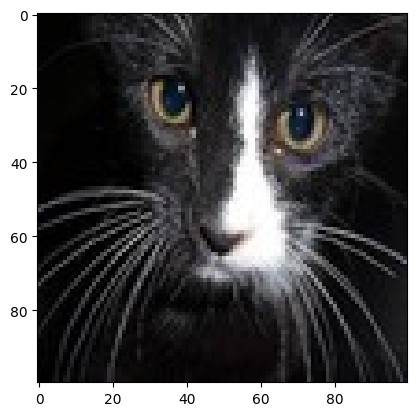

In [21]:
# displaying the images
import random
import matplotlib.pyplot as plt
rd = random.randint(0,len(x_train)) # for getting a random image data in the training data set
plt.imshow(x_train[rd])
plt.show()

* So this the picture transformed  in the training dataset ater normalising
* I love cat's 🥰🥰

* whenever you run the same code you get different values by the randint function

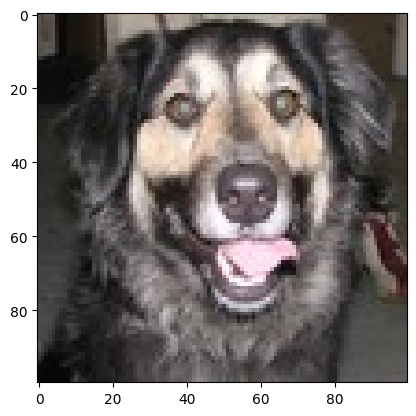

In [22]:
rd = random.randint(0,len(x_train)) # for getting a random image data in the training data set
plt.imshow(x_train[rd])
plt.show()

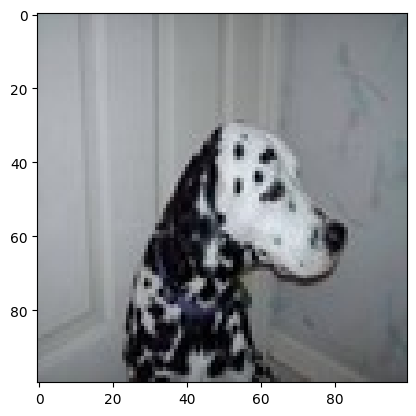

In [26]:
rd = random.randint(0,len(x_train))
plt.imshow(x_train[rd],cmap = 'magma')
plt.show()

# Building  the Model

In [38]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [39]:
model.compile(optimizer = 'adam',metrics = 'accuracy',loss='binary_crossentropy')

In [43]:
model.fit(x_train,y_train,epochs = 10,batch_size =3)

Epoch 1/10
667/667 [==============================] - 40s 54ms/step - loss: 0.0160 - accuracy: 0.5000
Epoch 2/10
667/667 [==============================] - 31s 47ms/step - loss: 0.0141 - accuracy: 0.5000
Epoch 3/10
667/667 [==============================] - 32s 48ms/step - loss: 0.0140 - accuracy: 0.5000
Epoch 4/10
667/667 [==============================] - 33s 50ms/step - loss: 0.0139 - accuracy: 0.5000
Epoch 5/10
667/667 [==============================] - 32s 48ms/step - loss: 0.0138 - accuracy: 0.5000
Epoch 6/10
667/667 [==============================] - 32s 47ms/step - loss: 0.0138 - accuracy: 0.5000
Epoch 7/10
667/667 [==============================] - 32s 47ms/step - loss: 0.0137 - accuracy: 0.5000
Epoch 8/10
667/667 [==============================] - 30s 45ms/step - loss: 0.0136 - accuracy: 0.5000
Epoch 9/10
667/667 [==============================] - 32s 48ms/step - loss: 0.0136 - accuracy: 0.5000
Epoch 10/10
667/667 [==============================] - 31s 47ms/step - loss: 0.013

* since the testing data set is very low((1:5) the model accuracy is poor..If we increase the size of testing set and play with the hyperparameters it will improve

In [49]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 2s 180ms/step - loss: 231.7469 - accuracy: 0.5025


[231.74693298339844, 0.5024999976158142]

*  If the model is trained aain the accuracy amy slightly imporove


In [50]:
model.fit(x_train,y_train,epochs = 10,batch_size =3)

Epoch 1/10
667/667 [==============================] - 35s 53ms/step - loss: 0.0134 - accuracy: 0.5000
Epoch 2/10
667/667 [==============================] - 33s 50ms/step - loss: 0.0135 - accuracy: 0.5000
Epoch 3/10
667/667 [==============================] - 31s 47ms/step - loss: 0.0134 - accuracy: 0.5000
Epoch 4/10
667/667 [==============================] - 30s 45ms/step - loss: 0.0133 - accuracy: 0.5000
Epoch 5/10
667/667 [==============================] - 31s 46ms/step - loss: 0.0133 - accuracy: 0.5000
Epoch 6/10
667/667 [==============================] - 34s 52ms/step - loss: 0.0132 - accuracy: 0.5000
Epoch 7/10
667/667 [==============================] - 31s 47ms/step - loss: 0.0131 - accuracy: 0.5000
Epoch 8/10
667/667 [==============================] - 32s 47ms/step - loss: 0.0131 - accuracy: 0.5000
Epoch 9/10
667/667 [==============================] - 31s 46ms/step - loss: 0.0131 - accuracy: 0.5000
Epoch 10/10
667/667 [==============================] - 31s 46ms/step - loss: 0.013

In [51]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 96ms/step - loss: 364.9716 - accuracy: 0.5000


[364.9716491699219, 0.5]

# Makiing Indivdual Predictions

In [73]:
x_test

array([[118.,  82.,  96., ..., 140.,  79.,  16.],
       [223., 211., 163., ...,  70.,  73.,  78.],
       [ 73.,  67.,  43., ..., 222., 211., 165.],
       ...,
       [249., 245., 242., ...,  73.,  72.,  68.],
       [ 97.,  96., 102., ...,  84.,  78.,  80.],
       [ 94.,  66.,  63., ..., 119.,  96.,  80.]])

In [75]:
x_test =x_test/255.0

1/1 [==============================] - 0s 33ms/step
[[0.00146613]]
Our moddel is predicting as  cat


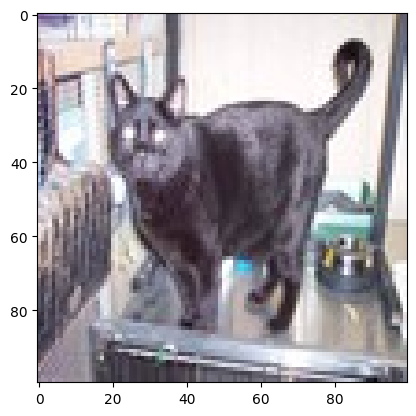

In [83]:

rd = random.randint(0,len(y_test))
plt.imshow(x_test[rd].reshape(100,100,3),cmap = 'magma')
y_pred = model.predict(x_test[rd].reshape(1,100,100,3))
print(y_pred)
y_pred = y_pred>0.5
if y_pred==0 :
  print('Our moddel is predicting as  cat')
else:
  print("Our moddel is predicting as dog")

plt.show()